In [1]:
# This notebook is for Assignment 2 of Homework 3 for PUI2018
# This notebook uses data from NYC Open Data
# https://data.cityofnewyork.us/Health/HIV-AIDS-Diagnoses-by-Neighborhood-Age-Group-and-R/dxnu-p2qd
# this notebook is based on the Assignment2_example.ipynb from Prof. Bianco
# For this assignment, I worked with Sam Falk. We looked at the NYC Open Data together and picked a data set. Then
# we inspected the data set and selected the variables for plotting. Initially, we picked year but realized that is not actually
# a true numerical variable. Then we picked HIV and AIDS. 

In [2]:
from __future__ import print_function #for compatibility beteen python2 and python3

# Find data on the portal

 Using NYC DOHMH data on new diagnoses of HIV and AIDS in NYC
 obtained with the following steps from the website 
 
 https://opendata.cityofnewyork.us/ -> Data
 https://opendata.cityofnewyork.us/data/ -> Department of Health and Mental Hygiene (DOHMH)
 https://data.cityofnewyork.us/browse?Dataset-Information_Agency=Department+of+Health+and+Mental+Hygiene+%28DOHMH%29 ->  HIV/AIDS Diagnoses by Neighborhood, Sex, and Race/Ethnicity
 
https://data.cityofnewyork.us/Health/HIV-AIDS-Diagnoses-by-Neighborhood-Sex-and-Race-Et/ykvb-493p ->  View Data 
 
https://data.cityofnewyork.us/Health/HIV-AIDS-Diagnoses-by-Neighborhood-Sex-and-Race-Et/ykvb-493p -> Export
 
 this gives me various links. I copy and paste below the CSV link
 
 https://data.cityofnewyork.us/api/views/ykvb-493p/rows.csv?accessType=DOWNLOAD 
 
 name the file as HIVAIDsdata.csv

# solution 1: download from the portal 


In [3]:
!curl https://data.cityofnewyork.us/api/views/ykvb-493p/rows.csv?accessType=DOWNLOAD > HIVAIDsdata.csv

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  164k    0  164k    0     0   637k      0 --:--:-- --:--:-- --:--:--  637k


In [4]:
# check to see if there is a PUIDATA env variable
import os

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yg833/PUIdata


In [5]:
os.environ["PUIDATA"] = "%s/PUI2018/PUIdata"%os.getenv("HOME") ## force the PUIdata variable

print("PUIdata", os.getenv("PUIDATA"))

PUIdata /nfshome/yg833/PUI2018/PUIdata


In [6]:
# move the data
!mv HIVAIDsdata.csv $PUIDATA

In [7]:
#test if the data is there
!ls $PUIDATA

HIVAIDsdata.csv


## read in the data with pandas

In [8]:
#read in the data with pandas
import pandas as pd
import numpy as np
aids_df = pd.read_csv("%s/HIVAIDsdata.csv"%os.getenv("PUIDATA"))

In [9]:
#print the fist 8 lines out
aids_df.head(8)

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
0,2010,Greenpoint,Male,Black,6,330.4,0,0,5,275.3
1,2011,Stapleton - St. George,Female,Native American,0,0,0,0,0,0
2,2010,Southeast Queens,Male,All,23,25.4,5,21.7,14,15.4
3,2012,Upper Westside,Female,Unknown,0,0,0,0,0,0
4,2013,Willowbrook,Male,Unknown,0,0,0,0,0,0
5,2013,East Flatbush - Flatbush,Male,Black,54,56.5,8,14.8,33,34.5
6,2013,East Flatbush - Flatbush,Female,Native American,0,0,0,0,0,0
7,2013,Southwest Queens,Female,Unknown,0,0,0,0,0,0


In [10]:
#print the last 3 lines out
aids_df.tail(3)

,YEAR,Neighborhood (U.H.F),SEX,RACE/ETHNICITY,TOTAL NUMBER OF HIV DIAGNOSES,"HIV DIAGNOSES PER 100,000 POPULATION",TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES,PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES,"AIDS DIAGNOSES PER 100,000 POPULATION"
2925,2010,Bedford Stuyvesant - Crown Heights,Male,Native American,0,0,0,0,0,0
2926,2011,Long Island City - Astoria,Male,Black,6,97.6,1,16.7,3,48.8
2927,2011,Bensonhurst - Bay Ridge,Female,Hispanic,0,0,0,0,0,0


In [11]:
#look at the columns available, those are the variables
aids_df.columns

Index(['YEAR', 'Neighborhood (U.H.F)', 'SEX', 'RACE/ETHNICITY',
       'TOTAL NUMBER OF HIV DIAGNOSES', 'HIV DIAGNOSES PER 100,000 POPULATION',
       'TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES',
       'PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES',
       'TOTAL NUMBER OF AIDS DIAGNOSES',
       'AIDS DIAGNOSES PER 100,000 POPULATION'],
      dtype='object')

In [12]:
# inspect for the data type
aids_df.dtypes

YEAR                                                                    int64
Neighborhood (U.H.F)                                                   object
SEX                                                                    object
RACE/ETHNICITY                                                         object
TOTAL NUMBER OF HIV DIAGNOSES                                          object
HIV DIAGNOSES PER 100,000 POPULATION                                   object
TOTAL NUMBER OF CONCURRENT HIV/AIDS DIAGNOSES                          object
PROPORTION OF CONCURRENT HIV/AIDS DIAGNOSES AMONG ALL HIV DIAGNOSES    object
TOTAL NUMBER OF AIDS DIAGNOSES                                         object
AIDS DIAGNOSES PER 100,000 POPULATION                                  object
dtype: object

In [13]:
#count how many rows, those are the data points
aids_df.size

29280

In [14]:
# Check the unique values in the TOTAL NUMBER OF HIV DIAGNOSES
np.unique(aids_df[['TOTAL NUMBER OF HIV DIAGNOSES']])

array(['*', '0', '1', '10', '100', '101', '102', '104', '105', '107',
       '108', '109', '11', '110', '111', '112', '113', '114', '115', '116',
       '117', '12', '120', '122', '123', '125', '128', '129', '13', '131',
       '132', '133', '134', '135', '138', '14', '140', '141', '142', '143',
       '145', '147', '148', '15', '150', '151', '155', '16', '162', '164',
       '166', '168', '17', '171', '172', '178', '18', '187', '19', '195',
       '2', '20', '204', '21', '212', '22', '23', '237', '24', '25', '252',
       '26', '27', '271', '275', '28', '2832', '284', '29', '2990', '3',
       '30', '31', '314', '315', '32', '3225', '325', '33', '3353', '34',
       '35', '36', '37', '38', '39', '4', '40', '41', '42', '43', '44',
       '45', '46', '47', '48', '49', '5', '50', '51', '52', '53', '54',
       '55', '56', '57', '58', '59', '6', '60', '61', '62', '63', '64',
       '65', '66', '67', '68', '69', '7', '70', '71', '72', '73', '74',
       '75', '76', '77', '78', '79', '8', '

In [15]:
# Check the unique values in the "TOTAL NUMBER OF AIDS DIAGNOSES
np.unique(aids_df[['TOTAL NUMBER OF AIDS DIAGNOSES']])

array(['*', '0', '1', '10', '100', '101', '102', '104', '106', '108', '11',
       '110', '114', '118', '12', '120', '122', '124', '128', '129', '13',
       '132', '14', '144', '15', '155', '159', '16', '168', '17', '176',
       '1784', '18', '180', '19', '193', '2', '20', '201', '203', '2036',
       '21', '22', '221', '222', '229', '2292', '23', '24', '25', '26',
       '2611', '27', '28', '29', '3', '30', '31', '32', '33', '34', '35',
       '36', '37', '38', '39', '4', '40', '41', '42', '43', '44', '45',
       '46', '47', '48', '49', '5', '50', '51', '52', '53', '54', '55',
       '56', '57', '58', '59', '6', '60', '61', '62', '63', '64', '65',
       '66', '67', '68', '69', '7', '70', '71', '72', '73', '74', '75',
       '77', '78', '79', '8', '81', '82', '83', '84', '85', '86', '87',
       '88', '89', '9', '90', '91', '93', '96', '97', '98', '99'], dtype=object)

In [16]:
# Check the unique values in SEX and count the rows for each
# np.unique(aids_df[['SEX']])
aids_df['SEX'].value_counts()

Male      1376
Female    1376
All        176
Name: SEX, dtype: int64

In [17]:
# Check the unique values in Race/Ethnicity
# np.unique(aids_df[['RACE/ETHNICITY']])
aids_df['RACE/ETHNICITY'].value_counts()

All                       520
Asian/Pacific Islander    344
Native American           344
Hispanic                  344
White                     344
Black                     344
Unknown                   344
Multiracial               344
Name: RACE/ETHNICITY, dtype: int64

In [18]:
# filter out data points from the set that appears to be aggregates i.e. All an
aids_df_filtered = aids_df[(aids_df["SEX"] != "All")][(aids_df["RACE/ETHNICITY"] != "All")][(aids_df["TOTAL NUMBER OF AIDS DIAGNOSES"] != "*")][(aids_df["TOTAL NUMBER OF HIV DIAGNOSES"] != "*")]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [19]:
# select the 2 columns needed for the plot and coerce into numerics

aids_df2 = aids_df_filtered[['TOTAL NUMBER OF HIV DIAGNOSES', 'TOTAL NUMBER OF AIDS DIAGNOSES']].apply(pd.to_numeric, errors="coerce")

In [20]:
# change the text values into NaNs

aids_df2.replace('*', np.NaN, inplace = True)

In [21]:
# check the data types

aids_df2.dtypes

TOTAL NUMBER OF HIV DIAGNOSES     int64
TOTAL NUMBER OF AIDS DIAGNOSES    int64
dtype: object

In [22]:
# check the unique values

np.unique(aids_df2['TOTAL NUMBER OF HIV DIAGNOSES'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  48,  50,  52,  54,  55,
        56,  57,  58,  60,  62,  63,  65,  66,  74,  75,  79,  80,  81,
        84,  85,  87,  88,  90,  92,  94,  95,  96,  98,  99, 101, 102,
       109, 112, 113, 131])

In [23]:
# check the unique values

np.unique(aids_df2['TOTAL NUMBER OF AIDS DIAGNOSES'])

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  45,  46,  47,  48,  49,  50,  56,  57,
        58,  59,  60,  64,  68,  70,  72,  73,  74,  84, 102, 110])

In [24]:
# check the head of the values

aids_df2.head(10)

,TOTAL NUMBER OF HIV DIAGNOSES,TOTAL NUMBER OF AIDS DIAGNOSES
0,6,5
1,0,0
3,0,0
4,0,0
5,54,33
6,0,0
7,0,0
8,0,0
10,0,0
12,0,0


## plot the data

In [25]:
aids_df2.plot(x="TOTAL NUMBER OF HIV DIAGNOSES", y="TOTAL NUMBER OF AIDS DIAGNOSES")

In [16]:
# wont show anything if i do not use the magic command to show plots in the notebook 
#(or use pl.show to pop up a window, but for the homework plots have to be embedded)

In [26]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


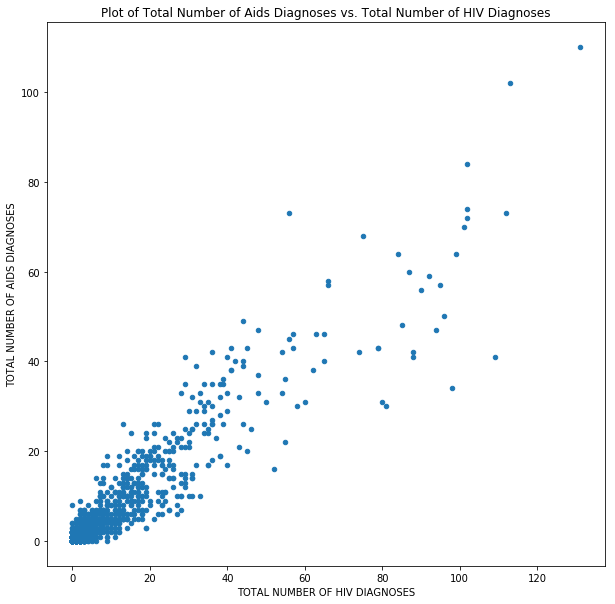

In [27]:
aids_df2.plot(x="TOTAL NUMBER OF HIV DIAGNOSES", 
              y="TOTAL NUMBER OF AIDS DIAGNOSES",
              kind='scatter', figsize=(10,10), 
              title="Plot of Total Number of Aids Diagnoses vs. Total Number of HIV Diagnoses");


Figure 1: The plot shows that there is a positive correlation between the Total Number of HIV Diagnoses and the Total Number of Aids Diagnoses -- as the total number of HIV diagnoses increased, the number of total aids diagnoses also increased. 

# solution 2: Use API and download a json file

from the dataset export link now go to -> SODA API and the the endpoint

In [28]:
# this is the url to the JSON file
url = "https://data.cityofnewyork.us/resource/6fha-ajet.json"

In [29]:
#use the appropriatepandas function to read in the json file
df = pd.read_json(url)

In [30]:
# print it out
df.head(8)

,aids_diagnoses_num,aids_diagnoses_num_per_100k,concurrent_hiv_aids_among_all,hiv_aids_concurrent_num,hiv_diagnoses_num,hiv_diagnoses_num_per_100k,neighborhood,race,sex,year
0,1,15.2,0,0,2,30.3,Fresh Meadows,Hispanic,Male,2013
1,0,0,0,0,3,113.1,Bedford Stuyvesant - Crown Heights,Multiracial,Male,2013
2,71,43,15.4,22,143,86.6,Central Harlem - Morningside Heights,All,All,2012
3,0,0,0,0,0,0,Ridgewood - Forest Hills,Multiracial,Female,2010
4,86,63.7,25,24,96,71.1,East Flatbush - Flatbush,All,Male,2012
5,0,0,0,0,0,0,Coney Island - Sheepshead Bay,Multiracial,Female,2010
6,0,0,0,0,0,0,Borough Park,Native American,Male,2010
7,0,0,0,0,0,0,High Bridge - Morrisania,Asian/Pacific Islander,Female,2012


In [31]:
# check the data types
df.dtypes

aids_diagnoses_num               object
aids_diagnoses_num_per_100k      object
concurrent_hiv_aids_among_all    object
hiv_aids_concurrent_num          object
hiv_diagnoses_num                object
hiv_diagnoses_num_per_100k       object
neighborhood                     object
race                             object
sex                              object
year                              int64
dtype: object

In [32]:
# filter out the values that shouldn't be part of the data set
df_filter = df[(df['sex'] != "All")][(df['race'] != "All")][(df['aids_diagnoses_num'] != "*")][(df['hiv_diagnoses_num'] != "*")]


/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  from ipykernel import kernelapp as app


In [33]:
# coerce the values into numerics
df_filter['aids_diagnoses_num'] = df_filter['aids_diagnoses_num'].apply(pd.to_numeric, errors="coerce")
df_filter['hiv_diagnoses_num'] = df_filter['hiv_diagnoses_num'].apply(pd.to_numeric, errors="coerce")

In [34]:
df3 = df_filter[['year', 'hiv_diagnoses_num', 'aids_diagnoses_num']]

df3.dtypes

year                  int64
hiv_diagnoses_num     int64
aids_diagnoses_num    int64
dtype: object

In [35]:
# change the "*" values into NaNs
df3.replace('*', np.NaN, inplace = True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [36]:
df3.head(8) # see the first 8 lines

,year,hiv_diagnoses_num,aids_diagnoses_num
0,2013,2,1
1,2013,3,0
3,2010,0,0
5,2010,0,0
6,2010,0,0
7,2012,0,0
9,2013,0,0
10,2012,28,10


for consistency with the data above, I will change the names of the columns (variables) to be the same as before. This way the plots will come out with the same labels and legends

In [37]:
# rename the columns so that it will have the kind of
df3.rename(columns = {'year' : 'Year','hiv_diagnoses_num':'TOTAL NUMBER OF HIV DIAGNOSES', 'aids_diagnoses_num':'TOTAL NUMBER OF AIDS DIAGNOSES'}, inplace=True)

/usr/local/Anaconda3-5.0.0-Linux-x86_64/envs/PUI2016_Python3/lib/python3.5/site-packages/pandas/core/frame.py:2754: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  **kwargs)


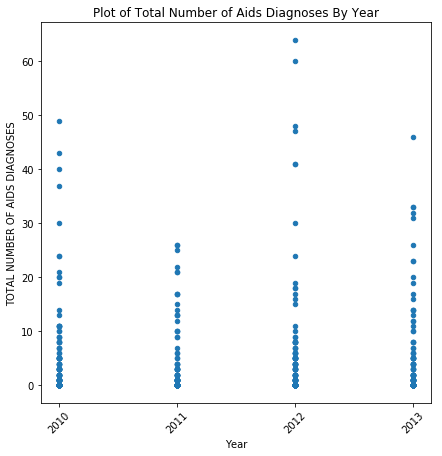

In [38]:
#Graphing number of aids diag by year
ax = df3.plot(x='Year',
              y='TOTAL NUMBER OF AIDS DIAGNOSES', 
              kind='scatter', figsize=(7,7),
              title = "Plot of Total Number of Aids Diagnoses By Year", xticks=range(2010,2014), rot=45);
ax.set_ylabel("TOTAL NUMBER OF AIDS DIAGNOSES");


### Figure 2: Plot of Number of Aids Diagnoses By Year between 2010- 2013.

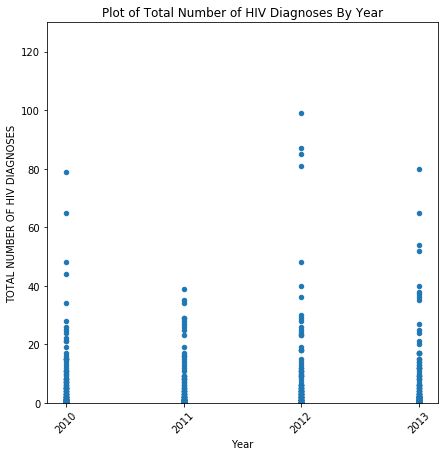

In [39]:
#Graphing number of hiv diag by year
ax = df3.plot(x='Year',
              y='TOTAL NUMBER OF HIV DIAGNOSES', 
              kind='scatter', figsize=(7,7),
              title = "Plot of Total Number of HIV Diagnoses By Year", xticks=range(2010,2014), rot=45, ylim = (0,130));
ax.set_ylabel("TOTAL NUMBER OF HIV DIAGNOSES");

### Figure 3: Plot of Number of HIV Diagnoses By Year between 2010- 2013.